# Experiment Setup

1. Define name of IQF experiment
1. Define path of the original(reference) dataset
1. Define path of the training script
1. DS_wrapper is the class that encapsulate a dataset
1. Define the list of modifications that will be applyed to the original dataset.

In [ ]:
import os

from iq_tool_box.datasets import DSModifier, DSWrapper,DSModifier_jpg
from iq_tool_box.experiments import ExperimentInfo, ExperimentSetup
from iq_tool_box.experiments.experiment_visual import ExperimentVisual
from iq_tool_box.experiments.task_execution import PythonScriptTaskExecution
from iq_tool_box.metrics import BBDetectionMetrics

In [1]:
#Define name of IQF experiment
experiment_name = "airplane"

#DS wrapper is the class that encapsulate a dataset
ref_dsw_train = DSWrapper(data_path="datasets/train")

#DS wrapper is the class that encapsulate a dataset
ref_dsw_val = DSWrapper(data_path="datasets/validation")

 * DSModifier refers to a modifier that simply does nothing - Reference training
 * DSModifier_jpg apply JPG compresion to the dataset

In [ ]:
#List of modifications that will be applied to the original dataset:
ds_modifiers_list = [
    DSModifier_jpg(params={'quality': i})
    for i in [10,30,50,70,90]
]

# Task execution executes the training loop
task = PythonScriptTaskExecution(model_script_path = 'yolov5/train.py')

Experiment definition, pass as arguments all the components defined beforehand:

In [ ]:
#Experiment definition, pass as arguments all the components defined beforehand
experiment = ExperimentSetup(
    experiment_name   = experiment_name,
    task_instance     = task,
    ref_dsw_train     = ref_dsw_train,
    ref_dsw_val       = ref_dsw_val,
    ds_modifiers_list = ds_modifiers_list,
    repetitions=5,
    extra_params: {"weights":['yolov5s.pt']}
)

# Execution

In [ ]:
#Execute the experiment
experiment.execute()

# Pick-up results / metrics and plot

 * Define name of IQF experiment
 * Define path of the original(reference) dataset

In [1]:
#Define name of IQF experiment
experiment_name = "airplane"

## Load experiment info
 - ExperimentInfo is used to retrieve all the information of the whole experiment. 
 - It contains built in operations but also it can be used to retrieve raw data for futher analysis
 - The get_df method will sort data in a dataframe suitable for the visualizations

In [2]:
experiment_info = ExperimentInfo(experiment_name)

df = experiment_info.get_df(
    ds_params=["modifier"],
    metrics=["ap",'ap_0.5_all','weights','quality'],
    dropna = True,
    fields_to_float_lst = ['ap','ap_0.5_all'],
    fields_to_int_lst = ['quality']
)

In [3]:
df

,name,ds_modifier,ap,ap_0.5_all,min_plane_size,quality
0,SateAirports#jpg90_modifier,jpg90_modifier,0.936575,0.043528,30,90
1,SateAirports#jpg90_modifier_0,jpg90_modifier,0.887237,0.046832,30,90
2,SateAirports#jpg90_modifier_1,jpg90_modifier,0.874783,0.043926,30,90
3,SateAirports#jpg90_modifier_2,jpg90_modifier,0.879351,0.048211,30,90
4,SateAirports#jpg90_modifier_3,jpg90_modifier,0.888975,0.046086,30,90
...,...,...,...,...,...,...
95,SateAirports#jpg10_modifier_14,jpg10_modifier,0.520094,0.040593,11,10
96,SateAirports#jpg10_modifier_15,jpg10_modifier,0.507094,0.043096,11,10
97,SateAirports#jpg10_modifier_16,jpg10_modifier,0.542887,0.041962,11,10
98,SateAirports#jpg10_modifier_17,jpg10_modifier,0.489131,0.040315,11,10


## Visualize
 - Plotting utilities are available in it_tool_box

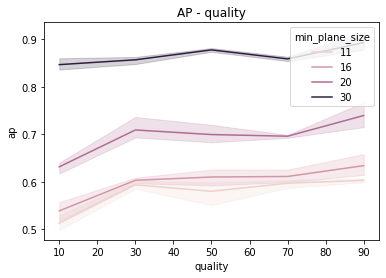

In [4]:
ev = ExperimentVisual(df, os.path.join(data_path, "mod-ap.png"))

ev.visualize(
    xvar="quality",
    yvar="ap",
    legend_var="weights",
    title="AP - quality"
)

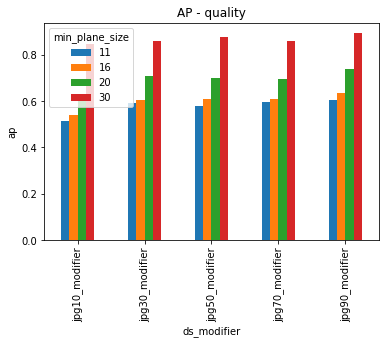

In [5]:
ev = ExperimentVisual(df, os.path.join(data_path, "mod-bars.png"))

ev.visualize(
    plot_kind="bars",
    xvar="ds_modifier",
    yvar="ap",
    legend_var="min_plane_size",
    title="AP - quality"
)